In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta

In [2]:
train=pd.read_csv(r'C:\Python\kaggle\@ON-Favorita货物销量预测\data\train.csv',usecols=[1, 2, 3, 4, 5],
    dtype={'onpromotion': bool},parse_dates=["date"],
    skiprows=range(1, 80000000))

In [3]:
train.tail

<bound method NDFrame.tail of                date  store_nbr  item_nbr  unit_sales  onpromotion
0        2016-01-01         25    105574        12.0        False
1        2016-01-01         25    105575         9.0        False
2        2016-01-01         25    105857         3.0        False
3        2016-01-01         25    108634         3.0        False
4        2016-01-01         25    108701         2.0         True
5        2016-01-01         25    108786         2.0        False
6        2016-01-01         25    108797         1.0        False
7        2016-01-01         25    108952        12.0        False
8        2016-01-01         25    111397         5.0        False
9        2016-01-01         25    114790         4.0        False
10       2016-01-01         25    114799         2.0        False
11       2016-01-01         25    114800         1.0        False
12       2016-01-01         25    115267         3.0        False
13       2016-01-01         25    115611      

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
def exp_distribution(df,target,bins=20):
    plt.figure(figsize=(12,8))
    sns.distplot(df[target].values, bins=bins, kde=True)

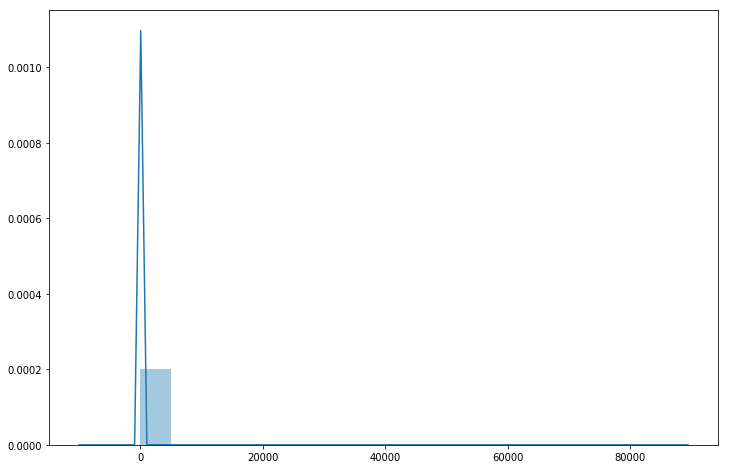

In [6]:
exp_distribution(train,'unit_sales')

In [28]:
def exp_distribution_log(df,target,bins=50):
    plt.figure(figsize=(12,8))
    sns.distplot(np.log1p(df.loc[:10000,target].values), bins=bins, kde=True)

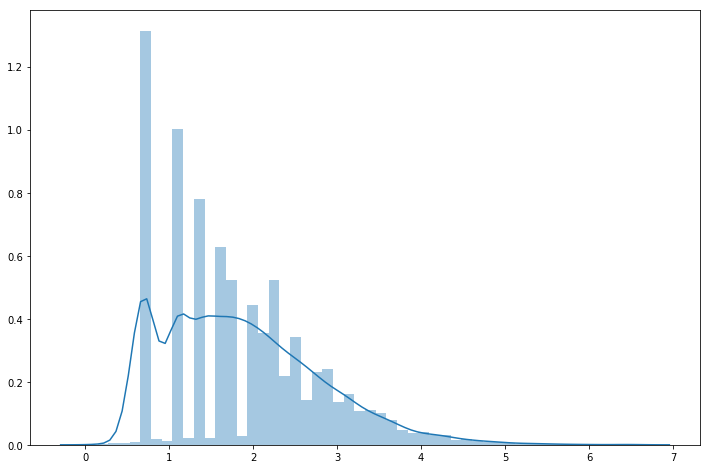

In [29]:
exp_distribution_log(train,'unit_sales')

In [18]:
def exp_distribution_log(df,target,bins=50):
    plt.figure(figsize=(12,8))
    sns.distplot(np.log1p(np.log1p(df.loc[:10000,target].values)), bins=bins, kde=True)

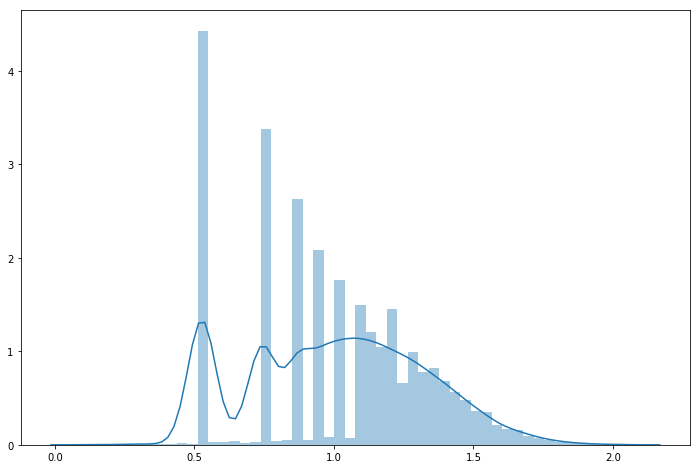

In [19]:
exp_distribution_log(train,'unit_sales')

In [ ]:
exp_distribution_log(train[train['unit_sales']>],'unit_sales')

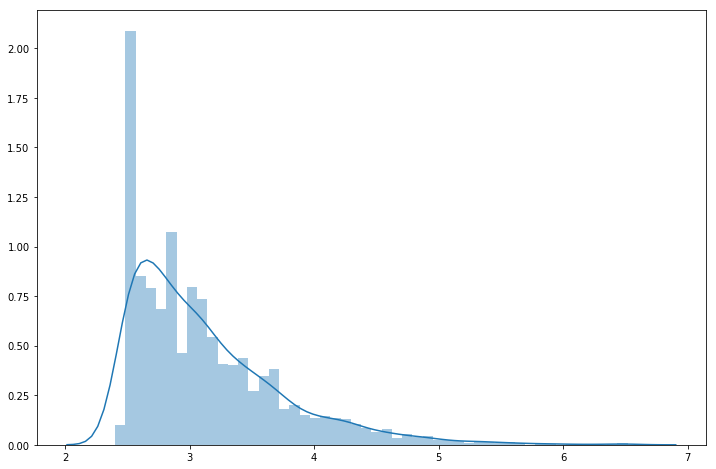

In [150]:
exp_distribution_log(train[train['unit_sales']>10],'unit_sales')

In [30]:
train.shape

(59038132, 5)

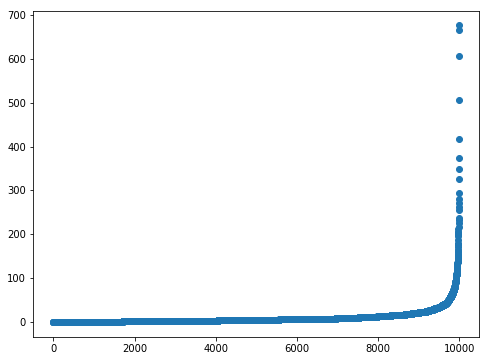

In [44]:
def exp_banlance(df,target):
    plt.figure(figsize=(8,6))
    plt.scatter(range(df.loc[:10000,target].shape[0]), np.sort(df.loc[:10000,target].values))
    plt.show()
exp_banlance(train,'unit_sales')

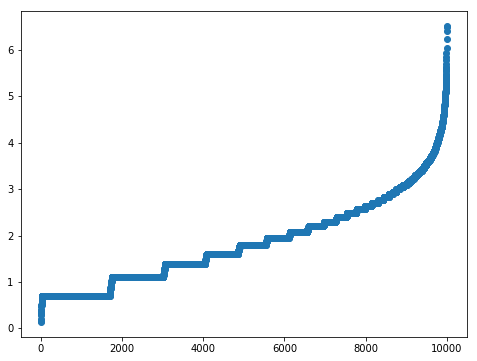

In [45]:
def exp_banlance(df,target):
    plt.figure(figsize=(8,6))
    plt.scatter(range(df.loc[:10000,target].shape[0]), np.sort(np.log1p(df.loc[:10000,target].values)))
    plt.show()
exp_banlance(train,'unit_sales')

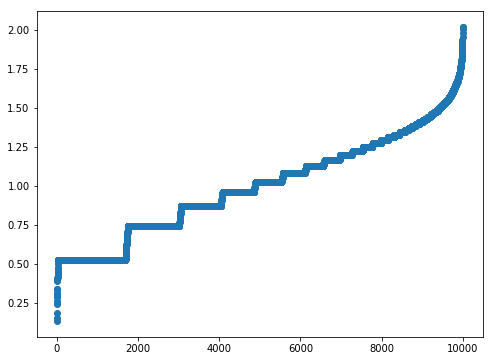

In [46]:
def exp_banlance(df,target):
    plt.figure(figsize=(8,6))
    plt.scatter(range(df.loc[:10000,target].shape[0]), np.sort(np.log1p(np.log1p(df.loc[:10000,target].values))))
    plt.show()
exp_banlance(train,'unit_sales')

In [ ]:
#经过计算，这个阶梯基本指代1,2,3,5……

In [ ]:
#每一个横段，都是样本集中堆积的地方，竖段则是基本没有落什么样本的单价区域

In [47]:
#这能不能说明该单独拎出来建模了，或者对一些数据做变化？某类商品具有相似的单位，合适放在一起学习吗？

In [50]:
train[train['date']>datetime.date(2017,8,14)]
#单日条目可达10,2812

,date,store_nbr,item_nbr,unit_sales,onpromotion
58935320,2017-08-15,1,103665,1.0,False
58935321,2017-08-15,1,105574,4.0,False
58935322,2017-08-15,1,105575,8.0,False
58935323,2017-08-15,1,105577,2.0,False
58935324,2017-08-15,1,105693,1.0,False
58935325,2017-08-15,1,105857,14.0,False
58935326,2017-08-15,1,108079,2.0,False
58935327,2017-08-15,1,108696,3.0,False
58935328,2017-08-15,1,108698,1.0,False
58935329,2017-08-15,1,108701,4.0,True


In [132]:
train[train['date']>datetime.date(2017,8,14)]['unit_sales'].value_counts()

1.000     22072
2.000     16171
3.000     11518
4.000      8528
5.000      6424
6.000      5030
7.000      3832
8.000      3094
9.000      2407
10.000     2025
11.000     1630
12.000     1476
13.000     1219
14.000      974
15.000      864
16.000      747
17.000      672
18.000      610
19.000      517
20.000      456
21.000      389
22.000      355
24.000      300
23.000      286
25.000      266
27.000      219
26.000      218
28.000      212
30.000      181
29.000      173
          ...  
15.690        1
6.868         1
2.186         1
2.443         1
1.032         1
2.230         1
1.684         1
7.293         1
26.831        1
9.397         1
5.219         1
25.351        1
8.968         1
10.907        1
18.649        1
4.682         1
51.205        1
1.332         1
8.413         1
14.542        1
8.607         1
4.592         1
3.202         1
14.330        1
7.635         1
8.524         1
4.937         1
3.231         1
42.322        1
1.791         1
Name: unit_sales, Length

In [142]:
count=train[train['date']>datetime.date(2017,8,14)]['unit_sales'].value_counts()

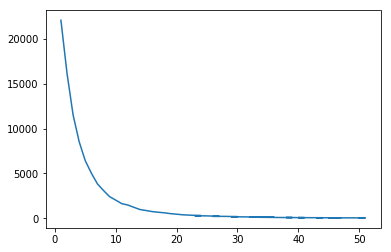

In [143]:
plt.plot(count[:50])

In [144]:
train[(train['date']>datetime.date(2017,8,14)) & (train['unit_sales']>8)].shape

(22166, 5)

In [145]:
train[(train['date']>datetime.date(2017,8,14)) & (train['unit_sales']<8)].shape

(77552, 5)

In [147]:
train['item_nbr'].unique().shape

(4036,)

In [148]:
count2=train[(train['date']>datetime.date(2017,8,14)) & (train['onpromotion']==True)]['unit_sales'].value_counts()

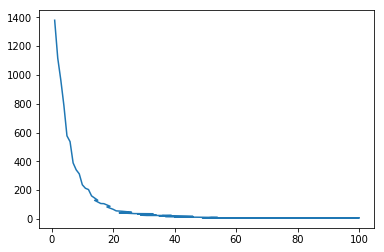

In [149]:
plt.plot(count2[:50])

In [134]:
'''
这里的决策树思路和人就完全不同了
决策树思维：为了减少这些样本的信息熵，我去看每一列对信息熵减小的能力最强，很明显，它只关心相对的火热关系排名
然而大部分的商品销量的波动性特别大
根本不能这么分，没逻辑

'''

'\n这里的决策树思路和人就完全不同了\n决策树思维：为了减少这些样本的信息熵，我去看每一列对信息熵减小的能力最强，很明显，它只关心相对的火热关系排名\n然而大部分的商品销量的波动性特别大\n根本不能这么分，没逻辑\n\n'

In [ ]:
#这里抽样观察一下baseline的预测

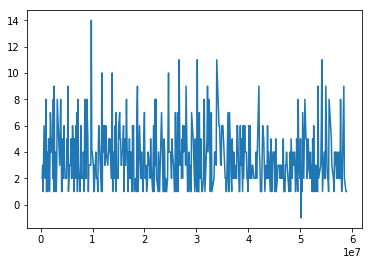

In [138]:
plt.plot(train[(train['item_nbr']==103665) & (train['store_nbr']==1)]['unit_sales'])

In [139]:
train[(train['item_nbr']==103665) & (train['store_nbr']==1)]

,date,store_nbr,item_nbr,unit_sales,onpromotion
299475,2016-01-05,1,103665,2.0,False
393937,2016-01-06,1,103665,3.0,False
487576,2016-01-07,1,103665,1.0,False
669491,2016-01-09,1,103665,6.0,False
868990,2016-01-11,1,103665,2.0,False
960596,2016-01-12,1,103665,2.0,False
1050811,2016-01-13,1,103665,8.0,False
1140169,2016-01-14,1,103665,1.0,False
1227957,2016-01-15,1,103665,4.0,False
1319293,2016-01-16,1,103665,1.0,False


In [ ]:
#注意，本列数据在baseline中预测为2.04

In [ ]:
103501
103520
103665
105574
105575
105576
105577
105693
105737
105857
106716
108079
108634
108696
108698
108701
108786
108797
108831
108833
108862
108952
111223
111397
112830
114778
114790
114799
114800
115267
115611


In [61]:
train.dtypes

date           datetime64[ns]
store_nbr               int64
item_nbr                int64
unit_sales            float64
onpromotion              bool
dtype: object

In [70]:
train[(train['item_nbr']==2061033) & (train['store_nbr']==30)]

,date,store_nbr,item_nbr,unit_sales,onpromotion
45669446,2017-04-11,30,2061033,1.0,False
45769257,2017-04-12,30,2061033,1.0,False
46395388,2017-04-18,30,2061033,1.0,False
46697651,2017-04-21,30,2061033,1.0,False
46806184,2017-04-22,30,2061033,1.0,False
47027848,2017-04-24,30,2061033,2.0,False
47234309,2017-04-26,30,2061033,4.0,False
47335945,2017-04-27,30,2061033,4.0,False
47438224,2017-04-28,30,2061033,3.0,False
47549568,2017-04-29,30,2061033,2.0,False


In [26]:
train[(train['item_nbr']==2061033) & (train['store_nbr']==30)]

,date,store_nbr,item_nbr,unit_sales,onpromotion
32128355,2017-04-11,30,2061033,1.0,False
32228166,2017-04-12,30,2061033,1.0,False
32854297,2017-04-18,30,2061033,1.0,False
33156560,2017-04-21,30,2061033,1.0,False
33265093,2017-04-22,30,2061033,1.0,False
33486757,2017-04-24,30,2061033,2.0,False
33693218,2017-04-26,30,2061033,4.0,False
33794854,2017-04-27,30,2061033,4.0,False
33897133,2017-04-28,30,2061033,3.0,False
34008477,2017-04-29,30,2061033,2.0,False


In [71]:
train[(train['item_nbr']==2061033) & (train['store_nbr']==30)]['unit_sales'].unique()
#我的妈耶，这不可能……差这么多???

array([  1.,   2.,   4.,   3.,   7.,   5.,   6.,   8.,  10.,  17.,  71.,
        13.,  16.])

In [74]:
train[(train['item_nbr']==2061033) & (train['store_nbr']==2)]

,date,store_nbr,item_nbr,unit_sales,onpromotion
55793357,2017-07-16,2,2061033,4.0,True
55905805,2017-07-17,2,2061033,3.0,True
56010209,2017-07-18,2,2061033,3.0,True
56111773,2017-07-19,2,2061033,8.0,True
56212746,2017-07-20,2,2061033,1.0,True
56313030,2017-07-21,2,2061033,2.0,False
56415153,2017-07-22,2,2061033,3.0,False
56524383,2017-07-23,2,2061033,2.0,False
56635078,2017-07-24,2,2061033,6.0,False
56740176,2017-07-25,2,2061033,1.0,False


In [75]:
train[(train['item_nbr']==2061033) & (train['store_nbr']==7)]

,date,store_nbr,item_nbr,unit_sales,onpromotion
56021212,2017-07-18,7,2061033,5.0,True
56122935,2017-07-19,7,2061033,3.0,True
56426835,2017-07-22,7,2061033,2.0,False
56536400,2017-07-23,7,2061033,1.0,False
56751212,2017-07-25,7,2061033,1.0,False
56852644,2017-07-26,7,2061033,1.0,False
56952128,2017-07-27,7,2061033,3.0,False
57050442,2017-07-28,7,2061033,2.0,False
57153992,2017-07-29,7,2061033,4.0,False
57376499,2017-07-31,7,2061033,3.0,False


In [72]:
train[(train['item_nbr']==2061033) & (train['store_nbr']==31)]

,date,store_nbr,item_nbr,unit_sales,onpromotion
45464742,2017-04-09,31,2061033,3.0,False
45569993,2017-04-10,31,2061033,1.0,False
45671296,2017-04-11,31,2061033,2.0,False
45771055,2017-04-12,31,2061033,2.0,False
46080444,2017-04-15,31,2061033,4.0,False
46189093,2017-04-16,31,2061033,7.0,False
46295022,2017-04-17,31,2061033,3.0,False
46397273,2017-04-18,31,2061033,2.0,False
46699458,2017-04-21,31,2061033,1.0,False
46808090,2017-04-22,31,2061033,1.0,False


In [ ]:
#这一打折价格就升高，神了，计量方式不一样吧……打包出售吧……

In [73]:
train[(train['item_nbr']==2061033) & (train['store_nbr']==51)]

,date,store_nbr,item_nbr,unit_sales,onpromotion
56000263,2017-07-17,51,2061033,2.0,True
56102055,2017-07-18,51,2061033,2.0,True
56202984,2017-07-19,51,2061033,2.0,True
56405198,2017-07-21,51,2061033,2.0,False
56514553,2017-07-22,51,2061033,2.0,False
56730383,2017-07-24,51,2061033,4.0,False
56931915,2017-07-26,51,2061033,1.0,False
57354416,2017-07-30,51,2061033,6.0,False
57461297,2017-07-31,51,2061033,2.0,False
57570647,2017-08-01,51,2061033,2.0,False


In [76]:
#另一个商品
train[(train['item_nbr']==119141) & (train['store_nbr']==7)]

,date,store_nbr,item_nbr,unit_sales,onpromotion
14808,2016-01-02,7,119141,1.0,False
115463,2016-01-03,7,119141,3.0,False
215912,2016-01-04,7,119141,1.0,False
312127,2016-01-05,7,119141,6.0,False
406913,2016-01-06,7,119141,1.0,False
499921,2016-01-07,7,119141,3.0,False
590496,2016-01-08,7,119141,3.0,False
682780,2016-01-09,7,119141,5.0,False
782286,2016-01-10,7,119141,5.0,False
881387,2016-01-11,7,119141,1.0,False


In [77]:
train[(train['item_nbr']==119141) & (train['store_nbr']==50)]

,date,store_nbr,item_nbr,unit_sales,onpromotion
94872,2016-01-02,50,119141,2.0,False
195060,2016-01-03,50,119141,14.0,False
292058,2016-01-04,50,119141,1.0,False
480268,2016-01-06,50,119141,10.0,False
571109,2016-01-07,50,119141,12.0,False
662237,2016-01-08,50,119141,7.0,False
761664,2016-01-09,50,119141,11.0,False
861053,2016-01-10,50,119141,8.0,False
1043890,2016-01-12,50,119141,5.0,False
1133181,2016-01-13,50,119141,4.0,False


In [ ]:
train[(train['item_nbr']==119141) & (train['store_nbr']==50)]

In [80]:
#一个价格超高的
train[(train['item_nbr']==2060793) & (train['store_nbr']==54)]

,date,store_nbr,item_nbr,unit_sales,onpromotion
44666737,2017-04-01,54,2060793,2.0,False
44777423,2017-04-02,54,2060793,16.0,False
44881084,2017-04-03,54,2060793,9.0,False
44986061,2017-04-04,54,2060793,12.0,False
45090310,2017-04-05,54,2060793,3.0,False
45190788,2017-04-06,54,2060793,3.0,False
45292535,2017-04-07,54,2060793,3.0,False
46340529,2017-04-17,54,2060793,6.0,False
46441546,2017-04-18,54,2060793,14.0,False
46540855,2017-04-19,54,2060793,17.0,False


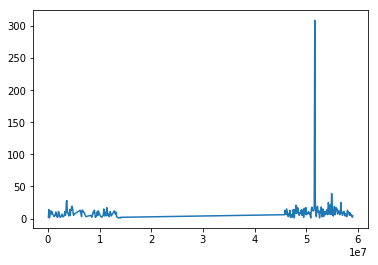

In [85]:
plt.plot(train[(train['item_nbr']==119141) & (train['store_nbr']==50)]['unit_sales'])

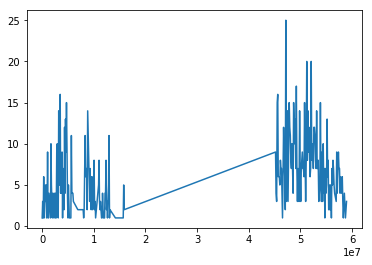

In [86]:
plt.plot(train[(train['item_nbr']==119141) & (train['store_nbr']==7)]['unit_sales'])

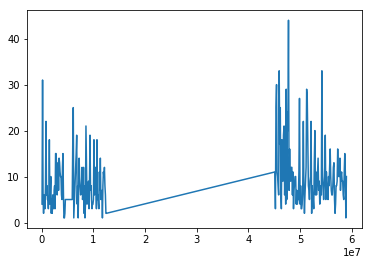

In [87]:
plt.plot(train[(train['item_nbr']==119141) & (train['store_nbr']==20)]['unit_sales'])

In [140]:
train[(train['item_nbr']==119141) & (train['store_nbr']==1)]

,date,store_nbr,item_nbr,unit_sales,onpromotion
1749,2016-01-02,1,119141,1.0,False
102572,2016-01-03,1,119141,8.0,False
202953,2016-01-04,1,119141,3.0,False
299508,2016-01-05,1,119141,1.0,False
393972,2016-01-06,1,119141,5.0,False
487611,2016-01-07,1,119141,1.0,False
577948,2016-01-08,1,119141,1.0,False
669525,2016-01-09,1,119141,7.0,False
769445,2016-01-10,1,119141,1.0,False
869022,2016-01-11,1,119141,2.0,False


In [ ]:
此数据1商店在baseline中预测为4

In [27]:
train[(train['item_nbr']==2061033) & (train['store_nbr']==2)]

,date,store_nbr,item_nbr,unit_sales,onpromotion
42252266,2017-07-16,2,2061033,4.0,True
42364714,2017-07-17,2,2061033,3.0,True
42469118,2017-07-18,2,2061033,3.0,True
42570682,2017-07-19,2,2061033,8.0,True
42671655,2017-07-20,2,2061033,1.0,True
42771939,2017-07-21,2,2061033,2.0,False
42874062,2017-07-22,2,2061033,3.0,False
42983292,2017-07-23,2,2061033,2.0,False
43093987,2017-07-24,2,2061033,6.0,False
43199085,2017-07-25,2,2061033,1.0,False


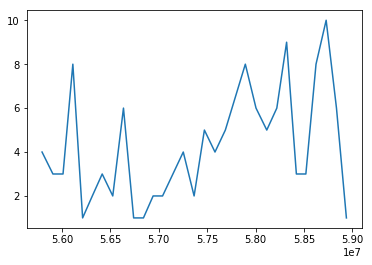

In [90]:
plt.plot(train[(train['item_nbr']==2061033) & (train['store_nbr']==2)]['unit_sales'])

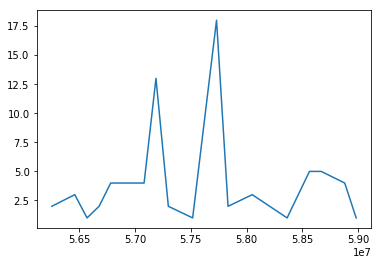

In [91]:
plt.plot(train[(train['item_nbr']==2061033) & (train['store_nbr']==25)]['unit_sales'])

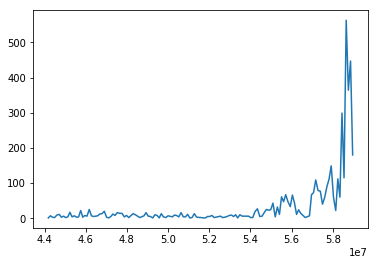

In [92]:
plt.plot(train[(train['item_nbr']==2061033) & (train['store_nbr']==20)]['unit_sales'])

In [128]:
train[(train['item_nbr']==2061033) & (train['store_nbr']==20)]

,date,store_nbr,item_nbr,unit_sales,onpromotion
44178162,2017-03-28,20,2061033,1.0,False
44278674,2017-03-29,20,2061033,7.0,False
44380502,2017-03-30,20,2061033,3.0,False
44481839,2017-03-31,20,2061033,2.0,False
44592831,2017-04-01,20,2061033,9.0,False
44708522,2017-04-02,20,2061033,11.0,False
44817347,2017-04-03,20,2061033,3.0,False
44920504,2017-04-04,20,2061033,6.0,False
45025317,2017-04-05,20,2061033,2.0,False
45128280,2017-04-06,20,2061033,4.0,False


In [ ]:
#train[(train['item_nbr']==2061033) & (train['store_nbr']==20)]
125574911	2017/8/16	20	2061033
125574911	53.2279

125785565	2017/8/17	20	2061033
125785565	11.8943
我觉得明显预测的有些保守了，但我也很难说……基本还是准的，人为也难以反馈
毕竟这是从过去中学的，模型觉得，热度该退了？
这个能说明，大部分在最近几天销量奇高的样本的历史模式是下跌，所以它才这么预测
大数据就是内部这么回事的
或者说，这个模型对这部分样本的反映的不好

In [141]:
train[(train['item_nbr']==2061033) & (train['store_nbr']==1)]

,date,store_nbr,item_nbr,unit_sales,onpromotion
55578771,2017-07-14,1,2061033,1.0,True
55680505,2017-07-15,1,2061033,3.0,True
55791011,2017-07-16,1,2061033,3.0,True
55903624,2017-07-17,1,2061033,1.0,True
56008094,2017-07-18,1,2061033,1.0,True
56310767,2017-07-21,1,2061033,5.0,False
56412826,2017-07-22,1,2061033,3.0,False
56522033,2017-07-23,1,2061033,2.0,False
56632896,2017-07-24,1,2061033,1.0,False
56839282,2017-07-26,1,2061033,11.0,False


In [ ]:
#125500792	1.4969，16号的2061033在1商店

In [ ]:
#以上例子可见打折不打折的的影响……很大，周末影响很大，如果处于长时间的打折期，则和短时间的打折期的处理方式不同

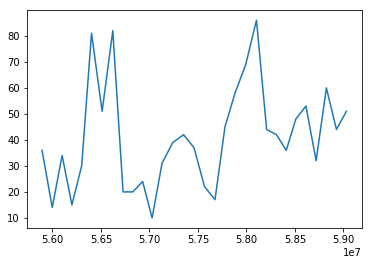

In [93]:
plt.plot(train[(train['item_nbr']==2061033) & (train['store_nbr']==50)]['unit_sales'])

In [28]:
train[(train['item_nbr']==2061033) & (train['store_nbr']==50)]

,date,store_nbr,item_nbr,unit_sales,onpromotion
42351766,2017-07-16,50,2061033,36.0,True
42456910,2017-07-17,50,2061033,14.0,True
42558775,2017-07-18,50,2061033,34.0,True
42659538,2017-07-19,50,2061033,15.0,True
42760144,2017-07-20,50,2061033,30.0,True
42861800,2017-07-21,50,2061033,81.0,False
42971078,2017-07-22,50,2061033,51.0,False
43081174,2017-07-23,50,2061033,82.0,False
43186894,2017-07-24,50,2061033,20.0,False
43288590,2017-07-25,50,2061033,20.0,False


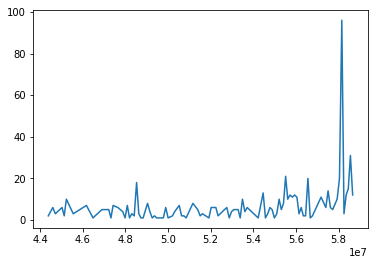

In [94]:
plt.plot(train[(train['item_nbr']==2061033) & (train['store_nbr']==21)]['unit_sales'])

In [129]:
train[(train['item_nbr']==2061033) & (train['store_nbr']==21)]

,date,store_nbr,item_nbr,unit_sales,onpromotion
44382391,2017-03-30,21,2061033,2.0,False
44595044,2017-04-01,21,2061033,6.0,False
44710740,2017-04-02,21,2061033,3.0,False
45027121,2017-04-05,21,2061033,6.0,False
45130082,2017-04-06,21,2061033,2.0,False
45230356,2017-04-07,21,2061033,10.0,False
45552932,2017-04-10,21,2061033,3.0,False
46170978,2017-04-16,21,2061033,7.0,False
46480633,2017-04-19,21,2061033,1.0,False
46579574,2017-04-20,21,2061033,2.0,False


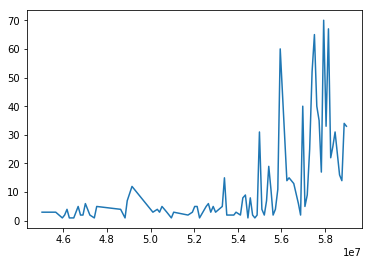

In [95]:
plt.plot(train[(train['item_nbr']==2061033) & (train['store_nbr']==22)]['unit_sales'])

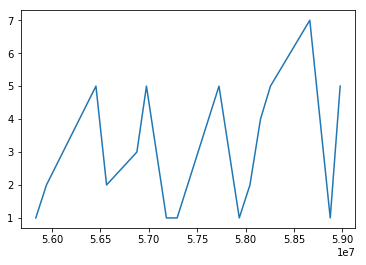

In [96]:
plt.plot(train[(train['item_nbr']==2061033) & (train['store_nbr']==23)]['unit_sales'])

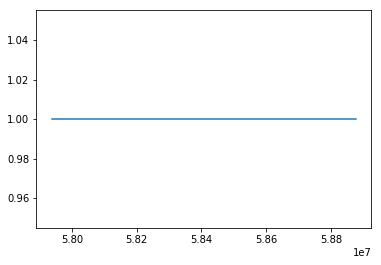

In [97]:
plt.plot(train[(train['item_nbr']==2061033) & (train['store_nbr']==24)]['unit_sales'])

In [98]:
train[(train['item_nbr']==2061033) & (train['store_nbr']==24)]

,date,store_nbr,item_nbr,unit_sales,onpromotion
57938012,2017-08-05,24,2061033,1.0,False
58048229,2017-08-06,24,2061033,1.0,False
58877187,2017-08-14,24,2061033,1.0,False


In [ ]:
#这他妈堪比股价啊

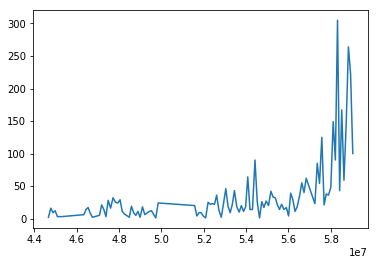

In [102]:
plt.plot(train[(train['item_nbr']==2060793) & (train['store_nbr']==54)]['unit_sales'])

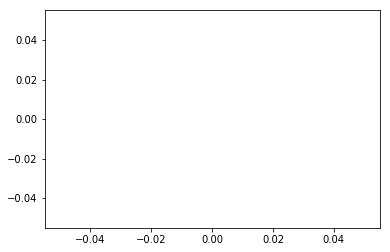

In [104]:
plt.plot(train[(train['item_nbr']==2060793) & (train['store_nbr']==50)]['unit_sales'])

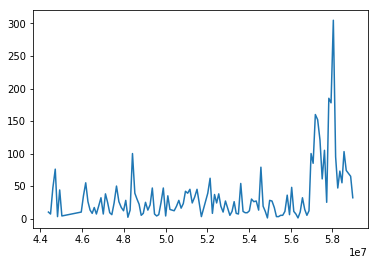

In [106]:
plt.plot(train[(train['item_nbr']==2060793) & (train['store_nbr']==20)]['unit_sales'])

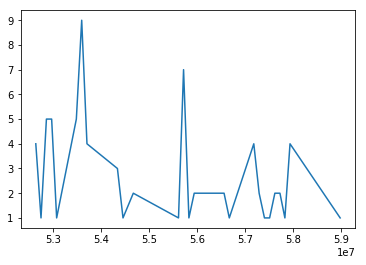

In [110]:
plt.plot(train[(train['item_nbr']==2062477) & (train['store_nbr']==21)]['unit_sales'])

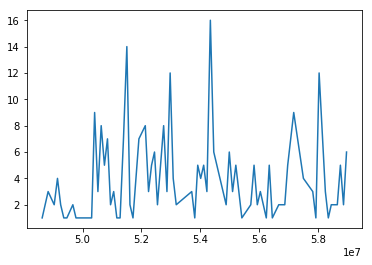

In [109]:
plt.plot(train[(train['item_nbr']==2062477) & (train['store_nbr']==20)]['unit_sales'])

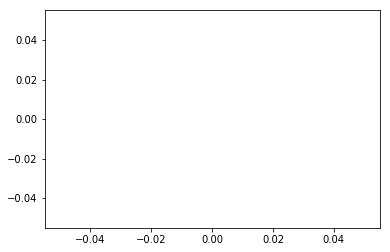

In [107]:
plt.plot(train[(train['item_nbr']==2062477) & (train['store_nbr']==4)]['unit_sales'])

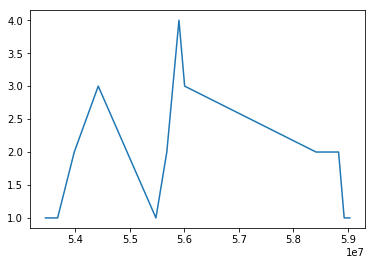

In [103]:
plt.plot(train[(train['item_nbr']==2062477) & (train['store_nbr']==54)]['unit_sales'])

In [29]:
train[(train['item_nbr']==2062477) & (train['store_nbr']==54)]

,date,store_nbr,item_nbr,unit_sales,onpromotion
39908521,2017-06-23,54,2062477,1.0,False
40132612,2017-06-25,54,2062477,1.0,False
40438158,2017-06-28,54,2062477,2.0,False
40878374,2017-07-02,54,2062477,3.0,False
41937876,2017-07-12,54,2062477,1.0,False
42137456,2017-07-14,54,2062477,2.0,False
42360499,2017-07-16,54,2062477,4.0,False
42465010,2017-07-17,54,2062477,3.0,False
44877013,2017-08-09,54,2062477,2.0,False
45080168,2017-08-11,54,2062477,2.0,False


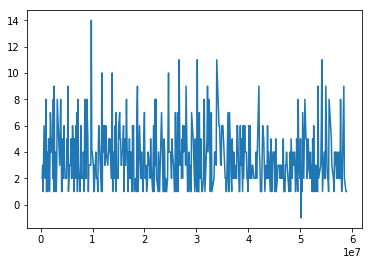

In [112]:
plt.plot(train[(train['item_nbr']==103665) & (train['store_nbr']==1)]['unit_sales'])

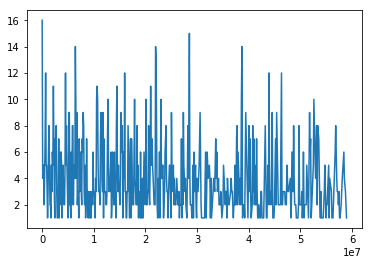

In [113]:
plt.plot(train[(train['item_nbr']==103665) & (train['store_nbr']==3)]['unit_sales'])

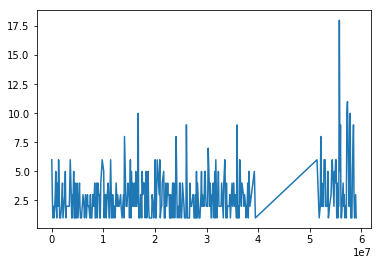

In [114]:
plt.plot(train[(train['item_nbr']==103665) & (train['store_nbr']==20)]['unit_sales'])

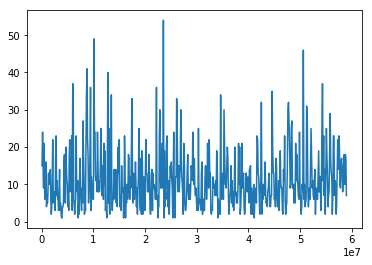

In [115]:
plt.plot(train[(train['item_nbr']==111223) & (train['store_nbr']==20)]['unit_sales'])

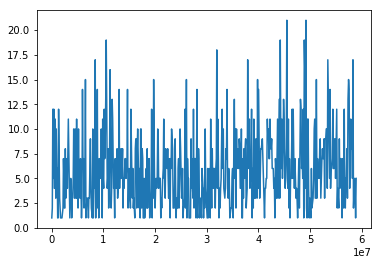

In [116]:
plt.plot(train[(train['item_nbr']==111223) & (train['store_nbr']==1)]['unit_sales'])

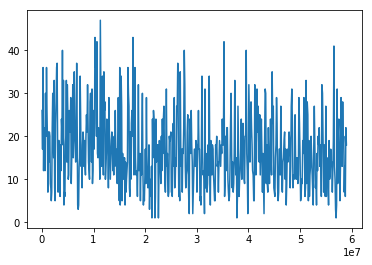

In [117]:
plt.plot(train[(train['item_nbr']==111223) & (train['store_nbr']==19)]['unit_sales'])

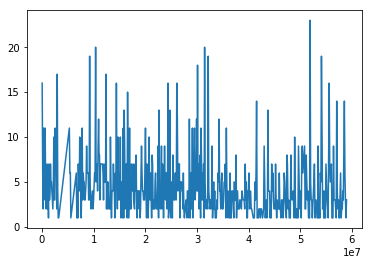

In [118]:
plt.plot(train[(train['item_nbr']==114799) & (train['store_nbr']==19)]['unit_sales'])

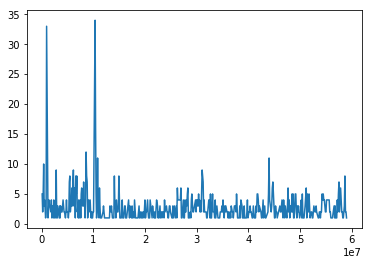

In [119]:
plt.plot(train[(train['item_nbr']==114799) & (train['store_nbr']==49)]['unit_sales'])

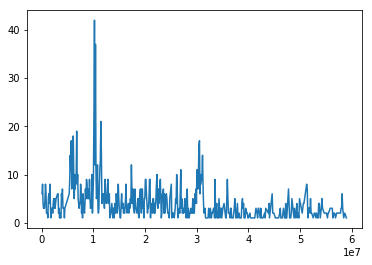

In [120]:
plt.plot(train[(train['item_nbr']==114799) & (train['store_nbr']==39)]['unit_sales'])

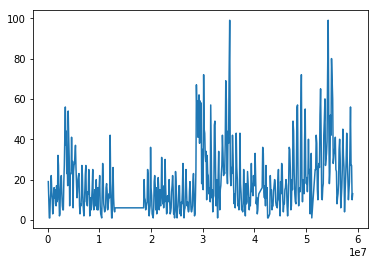

In [121]:
plt.plot(train[(train['item_nbr']==119624) & (train['store_nbr']==49)]['unit_sales'])

In [3]:
train[(train['item_nbr']==119624) & (train['store_nbr']==49)]

,date,store_nbr,item_nbr,unit_sales,onpromotion
5011318,2016-07-14,49,119624,6.0,False
5105336,2016-07-15,49,119624,20.0,False
5208235,2016-07-16,49,119624,11.0,False
5310669,2016-07-17,49,119624,10.0,False
5407761,2016-07-18,49,119624,5.0,False
5596655,2016-07-20,49,119624,8.0,False
5688365,2016-07-21,49,119624,9.0,False
5781617,2016-07-22,49,119624,25.0,False
5882828,2016-07-23,49,119624,22.0,False
5983223,2016-07-24,49,119624,5.0,False


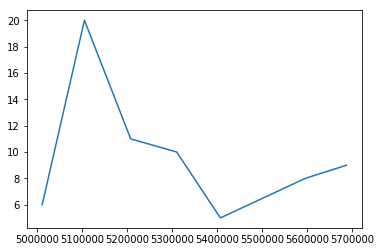

In [11]:
plt.plot(train[(train['item_nbr']==119624) & (train['store_nbr']==49)].iloc[:7,:]['unit_sales'])

In [13]:
train[(train['date']=='2016-07-19') & (train['store_nbr']==49)]

,date,store_nbr,item_nbr,unit_sales,onpromotion
5501823,2016-07-19,49,103520,1.0,False
5501824,2016-07-19,49,103665,7.0,False
5501825,2016-07-19,49,105574,4.0,False
5501826,2016-07-19,49,105575,25.0,False
5501827,2016-07-19,49,105737,4.0,False
5501828,2016-07-19,49,105857,20.0,False
5501829,2016-07-19,49,106716,4.0,False
5501830,2016-07-19,49,108634,12.0,False
5501831,2016-07-19,49,108698,1.0,False
5501832,2016-07-19,49,108701,2.0,False


In [ ]:
train[(train['item_nbr']==119624) & (train['store_nbr']==49)]

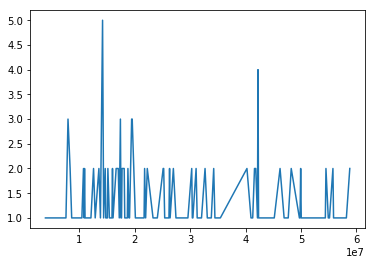

In [122]:
plt.plot(train[(train['item_nbr']==121964) & (train['store_nbr']==49)]['unit_sales'])

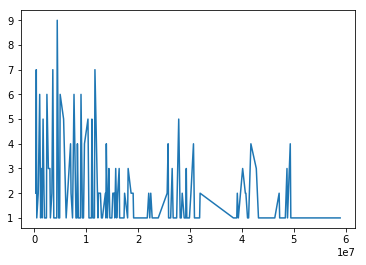

In [123]:
plt.plot(train[(train['item_nbr']==121964) & (train['store_nbr']==9)]['unit_sales'])

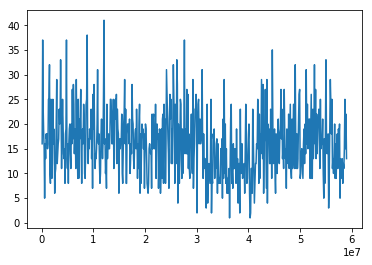

In [124]:
plt.plot(train[(train['item_nbr']==127547) & (train['store_nbr']==49)]['unit_sales'])

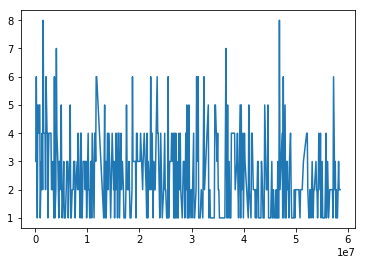

In [126]:
plt.plot(train[(train['item_nbr']==127547) & (train['store_nbr']==5)]['unit_sales'])

In [22]:
train[(train['item_nbr']==2013931) & (train['store_nbr']==54)] #断货

,date,store_nbr,item_nbr,unit_sales,onpromotion
33431995,2017-04-23,54,2013931,42.0,False
33536028,2017-04-24,54,2013931,76.0,False
33638733,2017-04-25,54,2013931,1.0,False
33946896,2017-04-28,54,2013931,12.0,False
34062755,2017-04-29,54,2013931,69.0,False
34176166,2017-04-30,54,2013931,250.0,False
34293284,2017-05-01,54,2013931,192.0,False
34401627,2017-05-02,54,2013931,14.0,False
34714423,2017-05-05,54,2013931,22.0,False
34828415,2017-05-06,54,2013931,102.0,False


In [23]:
train[(train['date']=='2017-07-15') & (train['store_nbr']==54)] #异常点

,date,store_nbr,item_nbr,unit_sales,onpromotion
42247200,2017-07-15,54,103501,4.0,False
42247201,2017-07-15,54,103520,3.0,False
42247202,2017-07-15,54,105576,13.0,False
42247203,2017-07-15,54,105693,2.0,True
42247204,2017-07-15,54,106716,1.0,False
42247205,2017-07-15,54,108701,2.0,False
42247206,2017-07-15,54,108786,1.0,False
42247207,2017-07-15,54,108797,10.0,False
42247208,2017-07-15,54,108833,1.0,False
42247209,2017-07-15,54,108952,4.0,False


In [24]:
train[(train['item_nbr']==559493) & (train['store_nbr']==11)] #异常点

,date,store_nbr,item_nbr,unit_sales,onpromotion
902,2016-05-23,11,559493,17.0,False
94134,2016-05-24,11,559493,22.0,False
185143,2016-05-25,11,559493,8.0,False
274913,2016-05-26,11,559493,9.0,False
365471,2016-05-27,11,559493,13.0,False
463926,2016-05-28,11,559493,11.0,False
562392,2016-05-29,11,559493,13.0,True
661775,2016-05-30,11,559493,10.0,False
757005,2016-05-31,11,559493,38.0,False
856718,2016-06-01,11,559493,24.0,False


In [25]:
train[(train['item_nbr']==2060793) & (train['store_nbr']==40)] #一个队促销极其敏感的样本

,date,store_nbr,item_nbr,unit_sales,onpromotion
32347098,2017-04-13,40,2060793,8.0,False
32448369,2017-04-14,40,2060793,6.0,False
32555742,2017-04-15,40,2060793,10.0,False
32663817,2017-04-16,40,2060793,13.0,False
32769457,2017-04-17,40,2060793,20.0,False
32871386,2017-04-18,40,2060793,45.0,False
32970052,2017-04-19,40,2060793,8.0,False
33070044,2017-04-20,40,2060793,10.0,False
33173331,2017-04-21,40,2060793,14.0,False
33283352,2017-04-22,40,2060793,27.0,False


In [21]:
train[train['unit_sales']>1000]

,date,store_nbr,item_nbr,unit_sales,onpromotion
164169,2016-05-24,54,757888,1203.000,True
164170,2016-05-24,54,757889,1203.000,True
164203,2016-05-24,54,830625,1632.000,True
734403,2016-05-30,54,454416,1803.000,True
758391,2016-05-31,11,1962621,1492.000,False
805165,2016-05-31,39,1976284,5000.000,False
831227,2016-05-31,51,1239986,5034.000,False
911431,2016-06-01,44,1503844,1019.097,True
965801,2016-06-02,20,839362,9610.000,False
966386,2016-06-02,20,1354711,4819.000,False


In [16]:
train[train['unit_sales']<3]

,date,store_nbr,item_nbr,unit_sales,onpromotion
6,2016-05-23,10,1243805,1.0,False
9,2016-05-23,10,1243817,1.0,False
11,2016-05-23,10,1246495,2.0,False
15,2016-05-23,10,1260238,2.0,False
16,2016-05-23,10,1260241,2.0,False
17,2016-05-23,10,1260242,2.0,False
19,2016-05-23,10,1299616,2.0,False
20,2016-05-23,10,1304488,2.0,False
22,2016-05-23,10,1306199,1.0,True
26,2016-05-23,10,1317095,2.0,False


In [7]:
train[train['unit_sales']>10000]

,date,store_nbr,item_nbr,unit_sales,onpromotion
10233826,2016-04-18,45,105574,11032.0,False
10234369,2016-04-18,45,559870,20748.0,False
10480456,2016-04-21,20,841842,44142.0,False
10481288,2016-04-21,20,1464133,16000.0,False
10481584,2016-04-21,20,2010127,10031.0,False
10520743,2016-04-21,45,265559,12228.0,False
10928151,2016-04-26,2,305227,10002.0,False
10929075,2016-04-26,2,1162932,15000.0,False
11500481,2016-05-02,2,220435,10055.0,False
11500524,2016-05-02,2,265559,10103.0,False


In [66]:
a=train['unit_sales']<0

In [67]:
b=train['store_nbr']==30

In [68]:
a & b

0           False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
            ...  
59038102    False
59038103    False
59038104    False
59038105    False
59038106    False
59038107    False
59038108    False
59038109    False
59038110    False
59038111    False
59038112    False
59038113    False
59038114    False
59038115    False
59038116    False
59038117    False
59038118    False
59038119    False
59038120    False
59038121    False
59038122    False
59038123    False
59038124    False
59038125    False
59038126  

In [69]:
train[a & b]

,date,store_nbr,item_nbr,unit_sales,onpromotion
1473541,2016-01-17,30,1119216,-1.000,False
1931886,2016-01-22,30,2010918,-1.000,False
2973581,2016-02-02,30,956011,-1.000,False
3162220,2016-02-04,30,1053943,-3.000,False
3723023,2016-02-10,30,205387,-1.000,False
6293465,2016-03-08,30,1369873,-1.000,False
6861174,2016-03-14,30,1369873,-1.000,False
8275925,2016-03-29,30,115693,-1.000,False
8964905,2016-04-05,30,1418844,-88.000,False
10788760,2016-04-24,30,1464065,-1.000,False
